### 4.5 OHLC와 캔들 차트

4.5.3 셀트리온 캔들 차트 (신버전으로 캔들 차트 그리기)

In [1]:
from bs4 import BeautifulSoup
import requests

url = 'https://finance.naver.com/item/sise_day.naver?code=068270&page=1'
html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text

bs = BeautifulSoup(html, 'lxml')
pgrr = bs.find('td', class_='pgRR')
s = str(pgrr.a['href']).split('=')
last_page = s[-1]

In [2]:
# 4.4.4 전체 페이지 읽어오기
import pandas as pd

df = pd.DataFrame()

sise_url = 'https://finance.naver.com/item/sise_day.naver?code=068270'

for page in range(1, int(last_page)+1):
    url = '{}&page={}'.format(sise_url, page)
    html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
    df = df._append(pd.read_html(html, header=0)[0])

In [3]:
# 차트 출력을 위해 데이터프레임 가공하기
df = df.dropna()
df = df.iloc[0:30]
df = df.rename(columns={'날짜':'Date', '시가':'Open', '고가':'High', '저가':'Low', '종가':'Close', '거래량':'Volume'})
df = df.sort_values(by='Date')
df.index = pd.to_datetime(df.Date)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

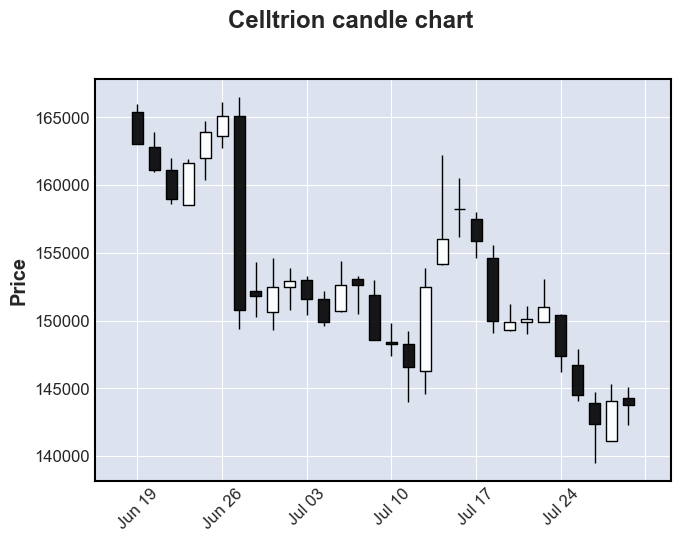

In [5]:
# mplfinance로 캔들 차트 그리기
import mplfinance as mpf

mpf.plot(df, title='Celltrion candle chart', type='candle')

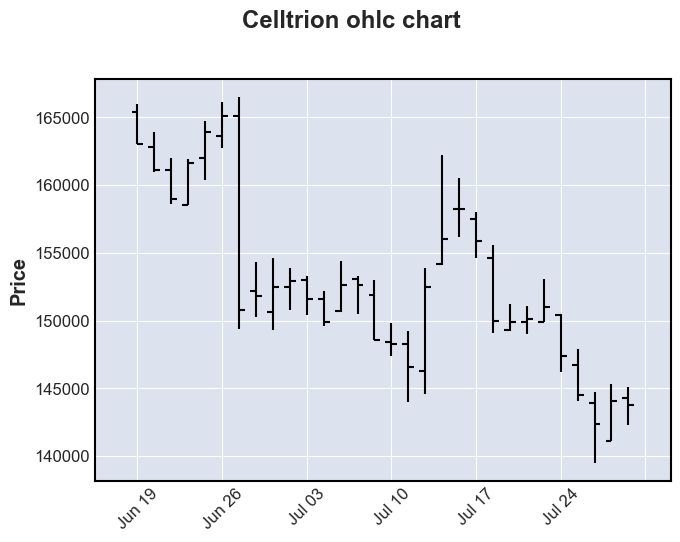

In [6]:
mpf.plot(df, title='Celltrion ohlc chart', type='ohlc')

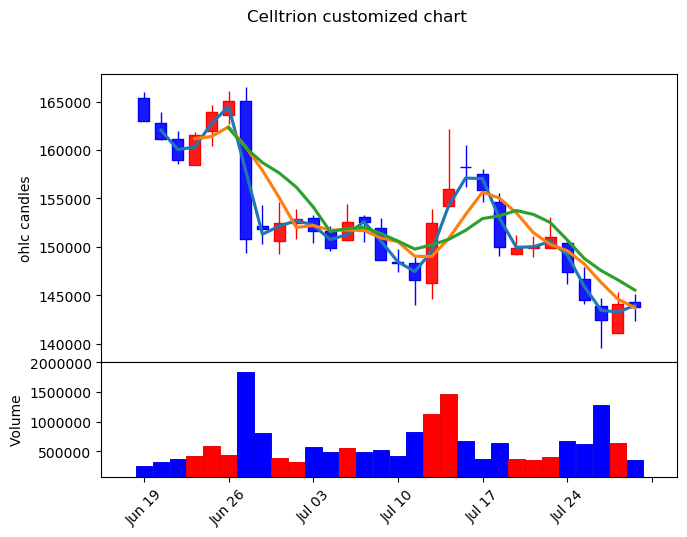

In [7]:
kwargs = dict(title='Celltrion customized chart', type='candle',
    mav=(2, 4, 6), volume=True, ylabel='ohlc candles')
mc = mpf.make_marketcolors(up='r', down='b', inherit=True)
s  = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(df, **kwargs, style=s)